In [1]:
import keras 
import tensorflow as tf 
import cv2 
import matplotlib.pyplot as plt 
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


In [2]:
model = load_model('weld_seg_UNET.h5',compile=False)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 200, 1000, 32)     1600      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 100, 500, 32)      0         
_________________________________________________________________
batch_normalization_135 (Bat (None, 100, 500, 32)      128       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 100, 500, 64)      100416    
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 50, 250, 64)       0         
_________________________________________________________________
batch_normalization_136 (Bat (None, 50, 250, 64)       256       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 50, 250, 128)      204928    
__________

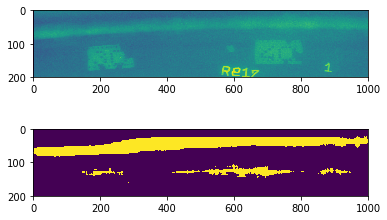

In [8]:
img = cv2.imread('./test_data/W0003_0023.png', 0)
#img = cv2.equalizeHist(img)
#label = cv2.imread('/home/iali/welds/data/masks/masks/w110.png', 0)
#label = cv2.resize(label, (1000,200))

img = cv2.resize(img, (1000,200,))

img = np.expand_dims(img,axis=2)
img = np.expand_dims(img,axis=0)
img = img/255

output = model.predict(img, batch_size=1)


newout = output[0,:,:,0]

newout=np.greater(newout, np.ones_like(newout)*0.5)
fig, axs = plt.subplots(2)

axs[0].imshow(img[0,:,:,0])
#axs[1].imshow(label)
axs[1].imshow(newout)
